### 신경망

In [16]:
import matplotlib.pyplot as plt
import torch

print(torch.__version__)

2.0.0


In [17]:
import torch

x = torch.tensor(5.0)

y = 3 * x ** 2

print(y)

tensor(75.)


In [18]:
x = torch.tensor(5.0, requires_grad=True) #미분 가능 설정
y = 3 * x ** 2

y.backward()

print(x.grad)

tensor(30.)


In [19]:
import torch
def rosebrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (1 - x0) ** 2
    return y


x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosebrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [20]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

iters = 10000
lr = 0.001

for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())

    y = rosebrock(x0, x1)

    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(), x1.item())

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


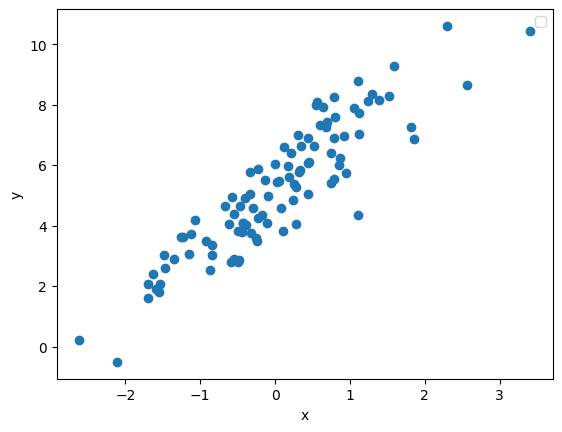

In [47]:
import torch

torch.manual_seed(0)
x = torch.randn(100, 1)
y = 2 * x + 5 + torch.randn(100, 1)

plt.scatter(x, y )
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


41.89796447753906
0.22483204305171967
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068
====
W = 2.2863590717315674
b = 5.3144850730896


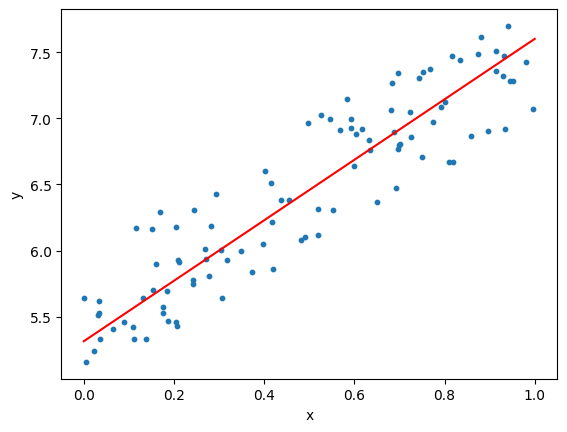

In [29]:
import torch


torch.manual_seed(0)
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
    y = x @ W + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    loss = mean_squared_error(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0: # print every 10 iterations
        print(loss.item())

print(loss.item())
print('====')
print('W =', W.item())
print('b =', b.item())


# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = W.detach().numpy() * x.detach().numpy() + b.detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
import torch
import torch.nn as nn

W = nn.Parameter(torch.zeros(1, 1))
b = nn.Parameter(torch.zeros(1))

print(W)
print(b)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [32]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.W = nn.Parameter(torch.zeros(1, 1))
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        y = x @ self.W + self.b
        return y


model = Model()

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [42]:
class Model(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)
        return y

model = Model()
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.8075]], requires_grad=True)
Parameter containing:
tensor([-0.8115], requires_grad=True)


In [45]:
x = torch.randn(100, 1)
y = 5 + 2 * x + torch.randn(100, 1)

lr = 0.1
iters = 100

model = Model()
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = mean_squared_error(y, y_hat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    print(loss.item())

37.807411193847656
36.27338409423828
34.78255081176758
33.335594177246094
31.93311309814453
30.575580596923828
29.263368606567383
27.99669647216797
26.775636672973633
25.600116729736328
24.46988296508789
23.384506225585938
22.3433837890625
21.345705032348633
20.3904972076416
19.47658920288086
18.602645874023438
17.767175674438477
16.968547821044922
16.205034255981445
15.474818229675293
14.776054382324219
14.106884002685547
13.46548843383789
12.850118637084961
12.25912857055664
11.691006660461426
11.144387245178223
10.61807632446289
10.11104679107666
9.622442245483398
9.151568412780762
8.6978759765625
8.260943412780762
7.840461254119873
7.436197280883789
7.047984600067139
6.675695419311523
6.319216251373291
5.978437423706055
5.653231620788574
5.343441963195801
5.048874378204346
4.769288539886475
4.504395961761475
4.253859043121338
4.0172905921936035
3.7942609786987305
3.5843005180358887
3.386906623840332
3.2015540599823
3.0276968479156494
2.8647823333740234
2.7122559547424316
2.56956911

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


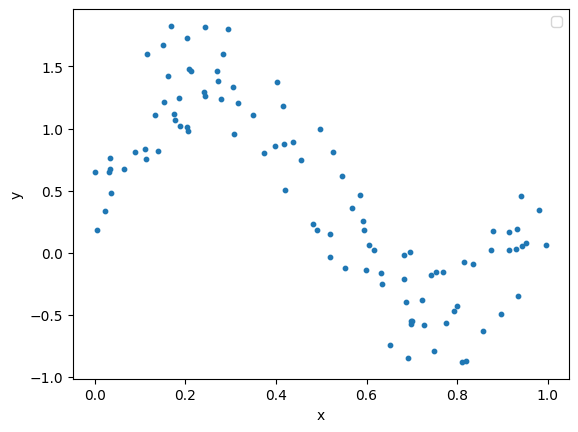

In [64]:
import torch

torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

plt.scatter(x, y, s=10)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [65]:
import torch.nn.functional as F

a = torch.randn(100, 1)

b = F.sigmoid(a)
c = F.relu(a)

print (a, b, c)

tensor([[-0.5111],
        [-1.7137],
        [-0.5101],
        [-0.4749],
        [-0.6334],
        [-1.4677],
        [-0.8785],
        [-2.0784],
        [-1.1005],
        [-0.7201],
        [ 0.0119],
        [ 0.3398],
        [-0.2635],
        [ 1.2805],
        [ 0.0194],
        [-0.8808],
        [ 0.4386],
        [-0.0107],
        [ 1.3384],
        [-0.2794],
        [-0.5518],
        [-2.8891],
        [-1.5100],
        [ 1.0241],
        [ 0.1954],
        [-0.7371],
        [ 1.7001],
        [ 0.3462],
        [ 0.9711],
        [ 1.4503],
        [-0.0519],
        [-0.6284],
        [-0.6538],
        [ 1.7198],
        [-0.9610],
        [-0.6375],
        [ 0.0747],
        [ 0.5600],
        [ 0.5314],
        [ 1.2351],
        [-1.1070],
        [-1.7174],
        [ 1.5346],
        [-0.0032],
        [-1.6034],
        [ 0.0581],
        [-0.6302],
        [ 0.7466],
        [ 1.1887],
        [-0.1575],
        [-0.0455],
        [ 0.6485],
        [ 0.

0.7643452286720276
0.23656319081783295
0.2322607785463333
0.22441408038139343
0.21026146411895752
0.1795787364244461
0.11798440665006638
0.08484040945768356
0.08022791147232056
0.0796809121966362
0.07946287840604782


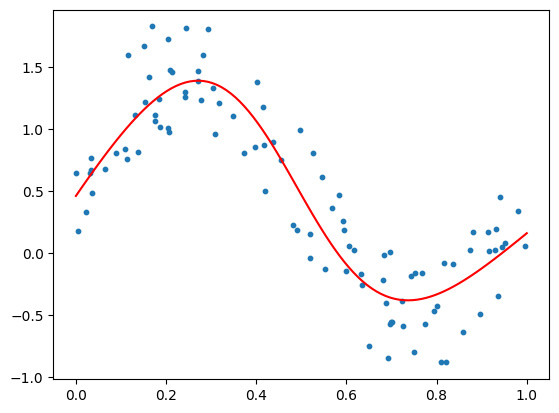

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

# model
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size= 10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y


lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_pred = model(x)
    loss = F.mse_loss(y, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

print(loss.item())

# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.linspace(0, 1, 100).reshape(-1, 1)
y = model(x).detach().numpy()
plt.plot(x, y, color='red')
plt.show()

In [66]:
import torchvision

print(torchvision.__version__)

0.15.1


/Users/chohi/project/ai/DeepLearningDeepen/DeepLearningAdv/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


size: 60000
type: <class 'PIL.Image.Image'>
label: 5


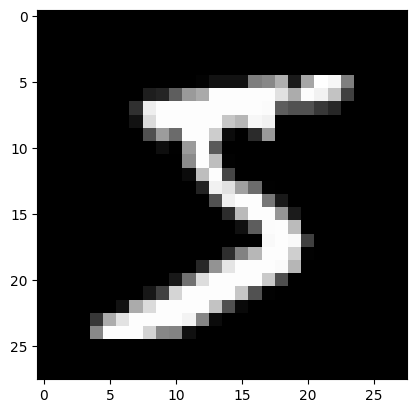

In [69]:
import torch
import torchvision
import matplotlib.pyplot as plt

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=None)

x, label = dataset[0]

print('size:', len(dataset))
print('type:', type(x))
print('label:', label)

plt.imshow(x, cmap='gray')
plt.show()

In [70]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.ToTensor()

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

x, label = dataset[0]
print('type:', type(x))
print('shape:', x.shape)

type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])


In [71]:
import torch
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=32,
    shuffle=True
)

for x, label in dataloader:
    print('x shape:', x.shape)
    print('label shape:', label.shape)
    break

x shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])
